In [1]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

from matplotlib import pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Data sets local/jaguar de noche/'

In [3]:
number_classes = {
'lote_1': len(os.listdir(path + 'lote 1')),
'lote_2': len(os.listdir(path + 'lote 2')),
'lote_3': len(os.listdir(path + 'lote 3 - camara')),
'lote_4': len(os.listdir(path + 'lote 4 - camara'))
}

## Number of images by lotes

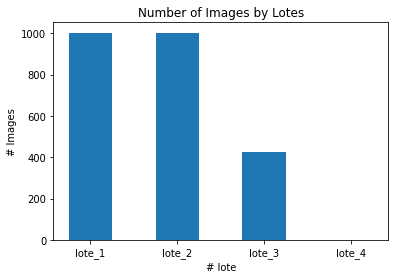

In [4]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Lotes");
plt.xlabel('# lote');
plt.ylabel('# Images');

## Plotting Images Size by lotes

In [5]:
directories = {
'lote_1': path + 'lote 1/',
'lote_2': path + 'lote 2/',
'lote_3': path + 'lote 3 - camara/'}

In [6]:
def get_dims(img):
  Y,X = img.shape[0], img.shape[1]
  return Y,X 

In [7]:
h_list = []
w_list = []

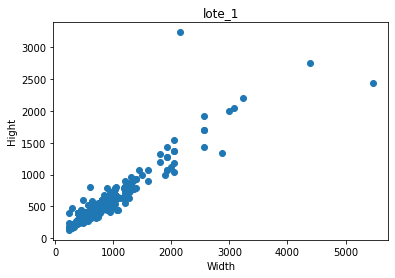

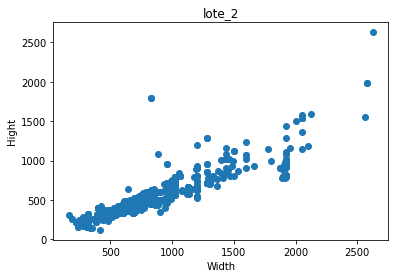

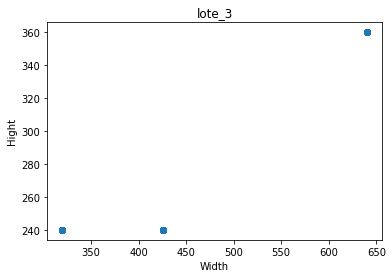

In [8]:

for key,value in directories.items():

  filepath = value
  filelist = [filepath + f for f in os.listdir(filepath)]

  for pathImage in filelist:
    img = cv2.imread(pathImage)
    if type(img) != type(None):
      y,x = get_dims(img)
      h_list.append(y)
      w_list.append(x)

  plt.scatter(w_list, h_list)
  plt.xlabel('Width')
  plt.ylabel('Hight')
  plt.title(key)
  plt.show()

  h_list = []
  w_list = []

## Comparing Images' Ratio

In [9]:
import math

In [10]:
aspect_ratios  = []

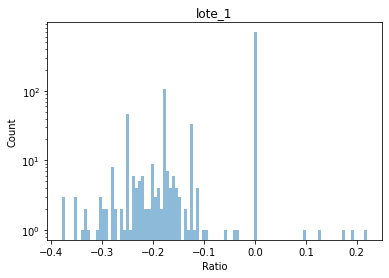

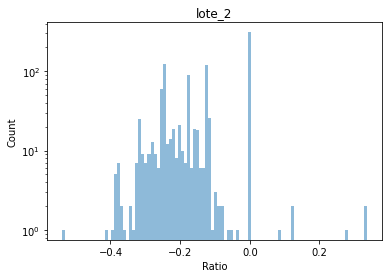

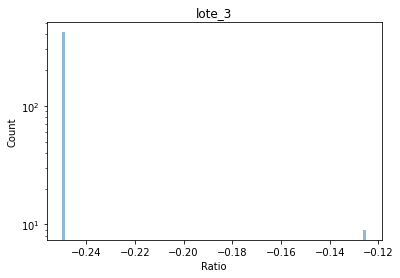

In [11]:
for key,value in directories.items():

  filepath = value
  filelist = [filepath + f for f in os.listdir(filepath)]

  for pathImage in filelist:
    img = cv2.imread(pathImage)
    if type(img) != type(None):
      aspect_ratios.append(math.log10(img.shape[0] / img.shape[1]))

  aspect_ratios = np.asarray(aspect_ratios)

  plt.hist(aspect_ratios, bins=100,log=True,alpha=0.5)
  plt.xlabel('Ratio')
  plt.ylabel('Count')
  plt.title(key)
  plt.show()

  aspect_ratios  = []


## Sample of data

In [83]:
sample_lote1 = []
sample_lote2 = []
sample_lote3 = []

In [84]:
lote_paths = list(directories.values())

In [87]:
def plotSample(lote,filelist):
  sample_image_list = []
  plt.figure(figsize=(15,12))
  c = 0
  print(lote)

  for pathImage in filelist[0:12]:
    img = cv2.imread(pathImage)
    if type(img) != type(None):
      sample_image_list.append(img)
      plt.subplot(3,4,c+1)
      c +=1
      plt.imshow(img)

  return sample_image_list

### Lote 1

lote 1


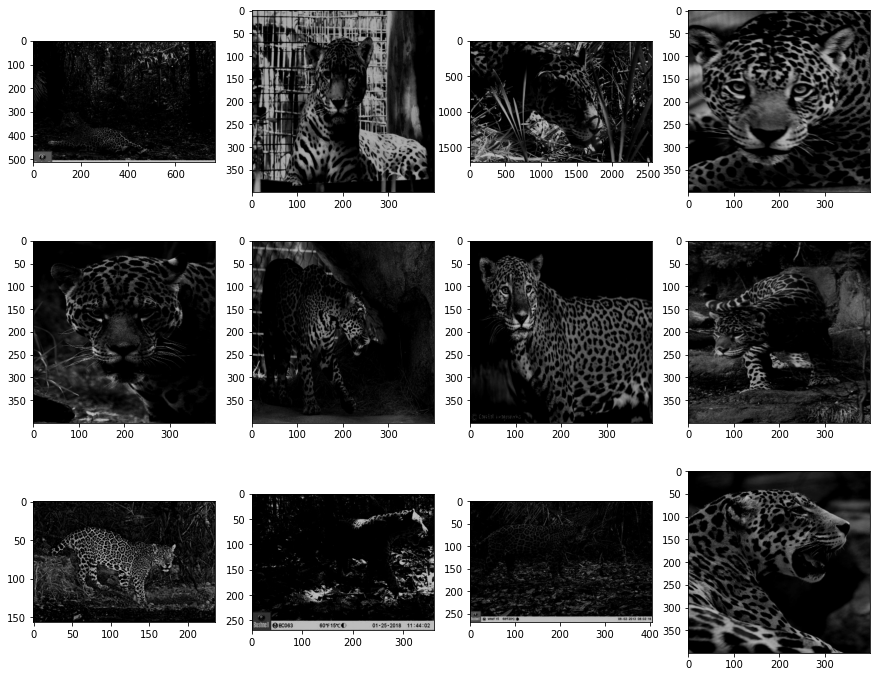

In [88]:
filepath = lote_paths[0]
filelist = [filepath + f for f in os.listdir(filepath)]
sample_lote1 = plotSample('lote 1',filelist)

### Lote 2

lote 2


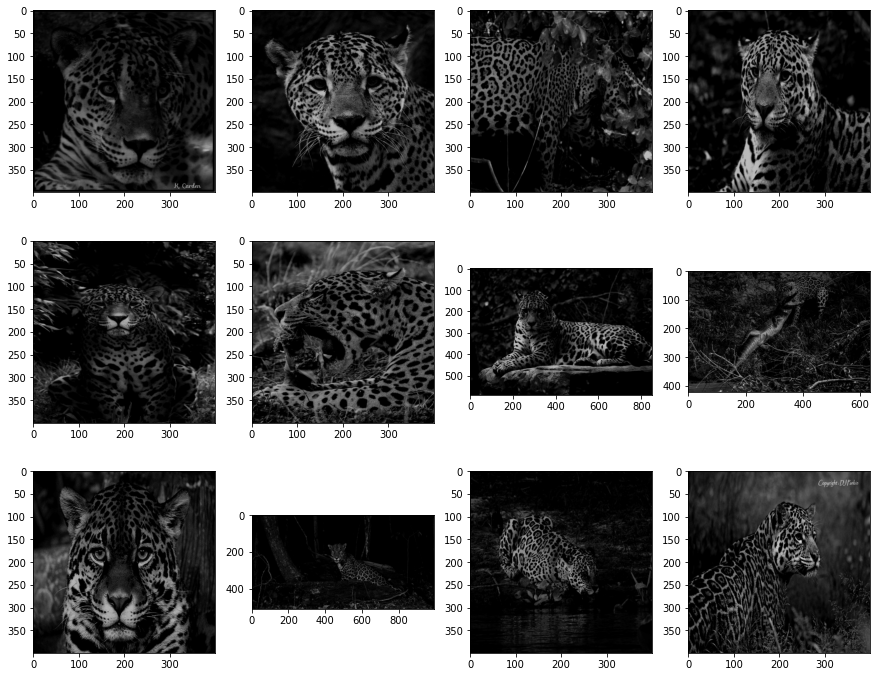

In [89]:
filepath = lote_paths[1]
filelist = [filepath + f for f in os.listdir(filepath)]
sample_lote2 = plotSample('lote 2',filelist)

### Lote 3

lote 3


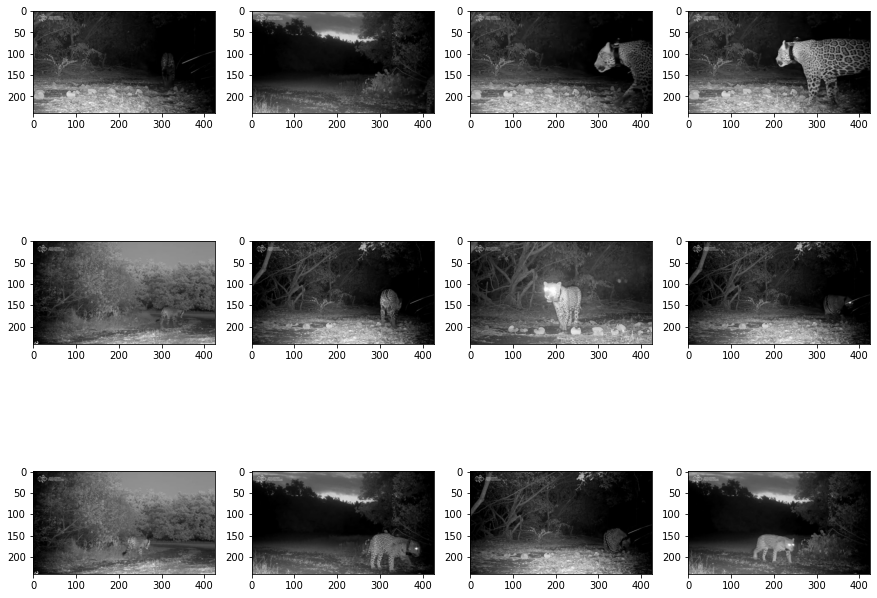

In [90]:
filepath = lote_paths[2]
filelist = [filepath + f for f in os.listdir(filepath)]
sample_lote3 = plotSample('lote 3',filelist)

## Basic Image Exploration

In [149]:
def imageResizing(lote):
  resized_image = []
  for original_image in lote:
    resized_image.append(cv2.resize(original_image,(480,270),interpolation=cv2.INTER_CUBIC))
  return resized_image

In [156]:
def plotSampleSD(image_list):
  
  counter_grid = 0
  counter = 1
  dims_list = []
  pixel_matrix_list = []

  plt.figure(figsize=(15,12))

  for image in image_list:
    
    if counter ==9:
      break
      
    if counter%2==0:
      dims_list.append(image.shape)
      pixel_matrix_list.append(np.reshape(image, (dims_list[1][0] * dims_list[1][1], dims_list[1][2])))
      plt.subplot(4,3,counter_grid+1)
      counter_grid +=1
      plt.hist2d(pixel_matrix_list[1][:,1], pixel_matrix_list[1][:,2], bins=(50,50))


      plt.subplot(4,3,counter_grid+1)
      counter_grid +=1
      plt.hist2d(pixel_matrix_list[0][:,2], pixel_matrix_list[1][:,2], bins=(50,50))


      dims_list = []
      pixel_matrix_list = []
      counter +=1

    else:

      dims_list.append(image.shape)
      pixel_matrix_list.append(np.reshape(image, (dims_list[0][0] * dims_list[0][1], dims_list[0][2])))
      plt.subplot(4,3,counter_grid+1)
      plt.hist2d(pixel_matrix_list[0][:,1], pixel_matrix_list[0][:,2], bins=(50,50))
      counter_grid +=1
      counter +=1

### Lote 1

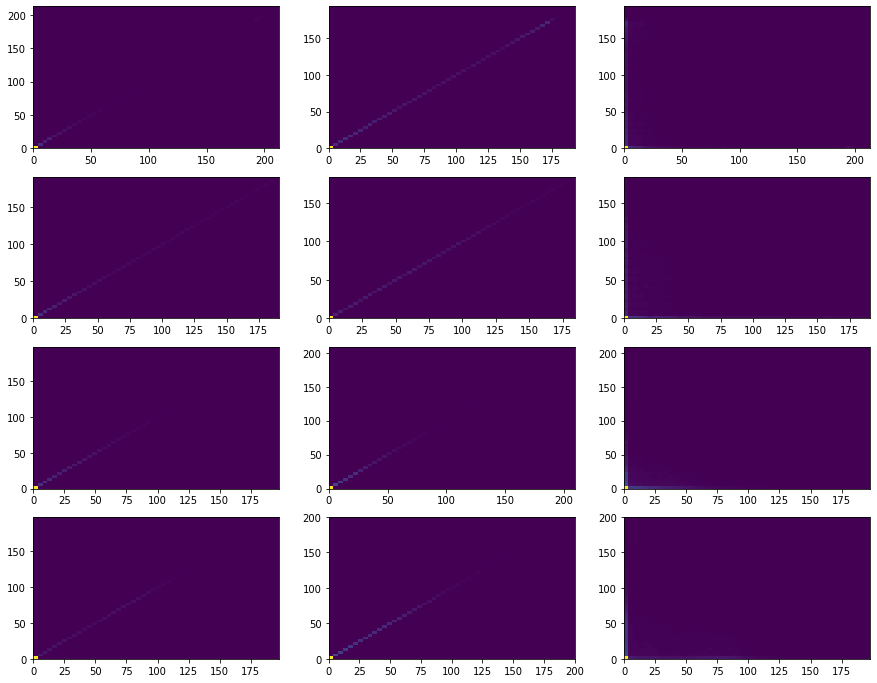

In [157]:
sample_lote1 = imageResizing(sample_lote1)
plotSampleSD(sample_lote1)

### lote 2

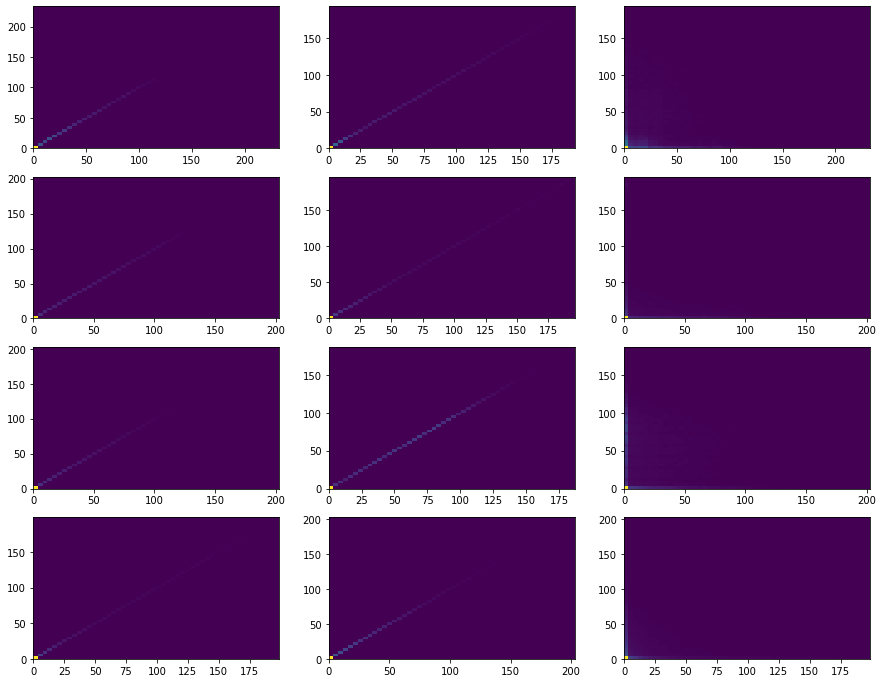

In [158]:
sample_lote2 = imageResizing(sample_lote2)
plotSampleSD(sample_lote2)

### Lote 3

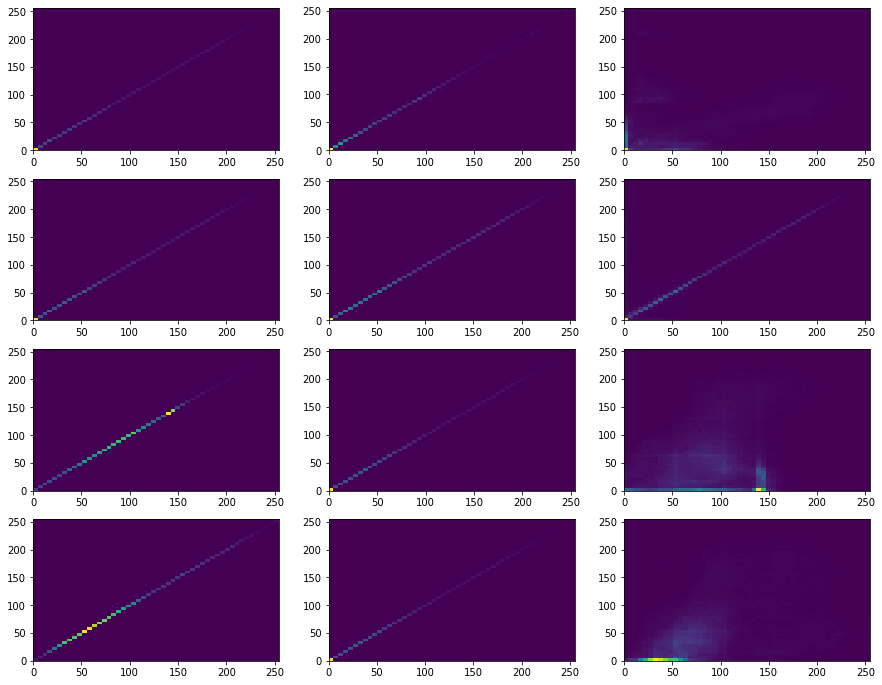

In [159]:
sample_lote3 = imageResizing(sample_lote3)
plotSampleSD(sample_lote3)

In [160]:
def plotSampleDiff(image_list):
  
  counter_grid = 0
  counter = 1
  dims_list = []
  pixel_matrix_list = []

  plt.figure(figsize=(15,12))

  for image in image_list:
    
    if counter ==9:
      break
      
    if counter%2==0:
     
      plt.subplot(4,3,counter_grid+1)
      counter_grid +=1
      plt.imshow(image)

      plt.subplot(4,3,counter_grid+1)
      counter_grid +=1
      plt.imshow(image_list[counter-2][:,:,2] - image_list[counter-1][:,:,1])
      
      counter +=1

    else:
      plt.subplot(4,3,counter_grid+1)
      counter_grid +=1
      plt.imshow(image)
      counter +=1

### Lote 1

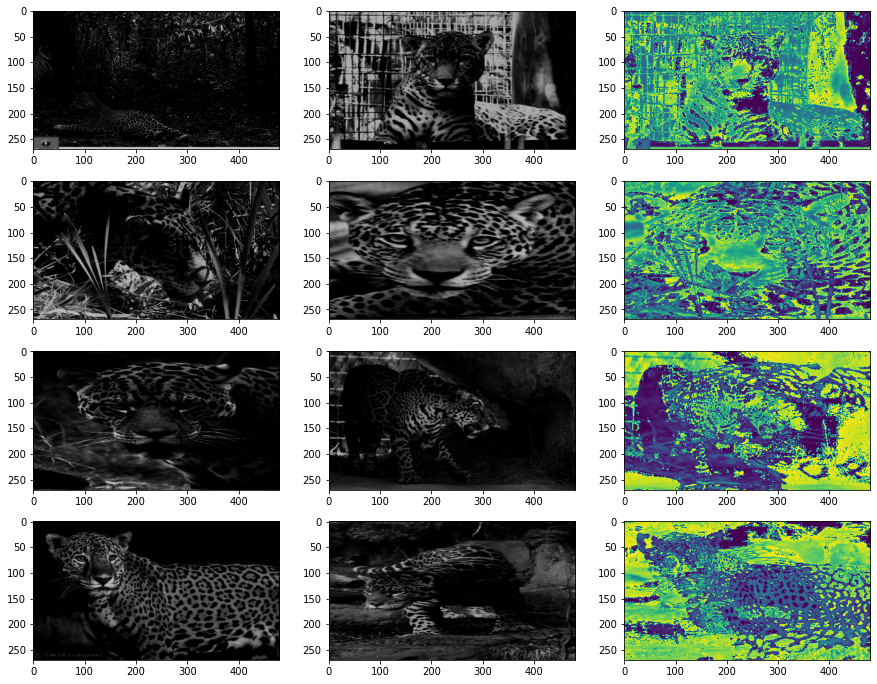

In [164]:
plotSampleDiff(sample_lote1)

### Lote 2

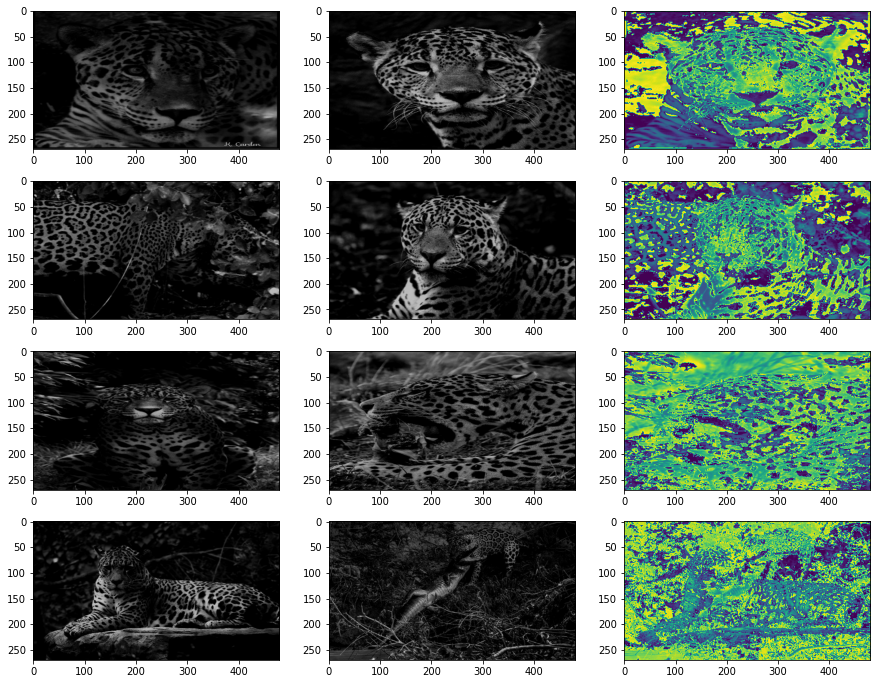

In [165]:
plotSampleDiff(sample_lote2)

### lote 3

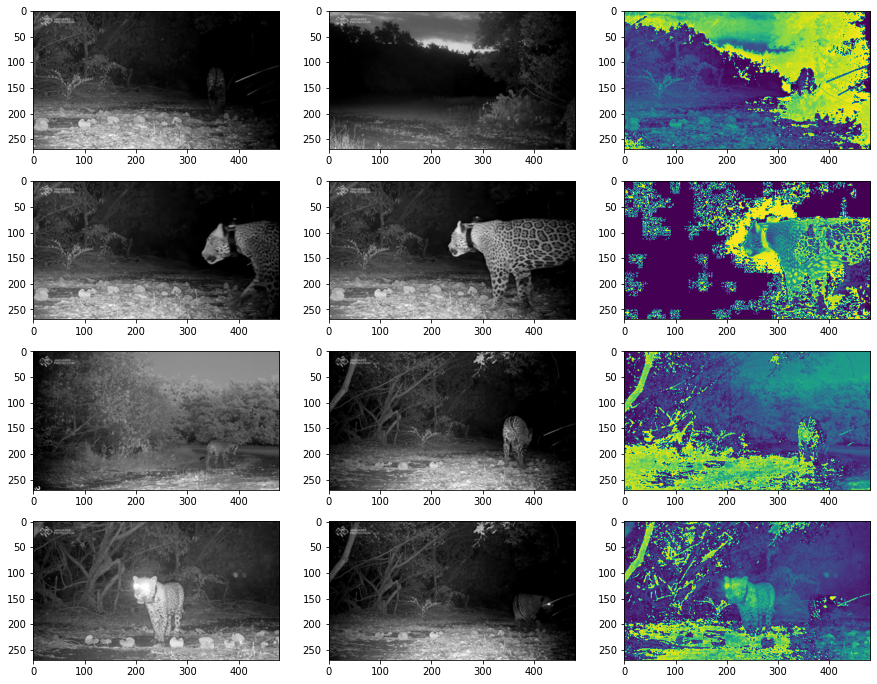

In [166]:
plotSampleDiff(sample_lote3)

---

## K-means clustering

In [194]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [200]:
def clusteringImage(dims,pixel_matrix,image):
  kmeans = KMeans(5)

  clustered = kmeans.fit_predict(pixel_matrix)
  clustered_img = np.reshape(clustered, (dims[0], dims[1]))

  return clustered_img, clustered

### Lote 1

#### img1

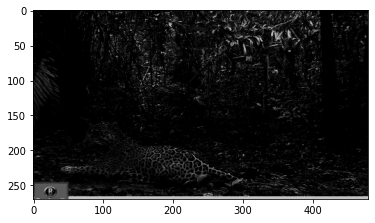

In [224]:

image1 = sample_lote1[0]
plt.imshow(image1)

dims = image1.shape
pixel_matrix1 = np.reshape(image1, (dims[0] * dims[1], dims[2]))

clustered_img, clustered1 = clusteringImage(dims=dims,pixel_matrix=pixel_matrix1,image=image1)
plt.imshow(image1)


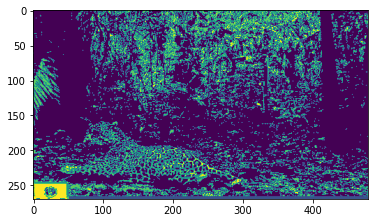

In [226]:
plt.imshow(clustered_img)

Text(0.5, 0, 'Red channel')

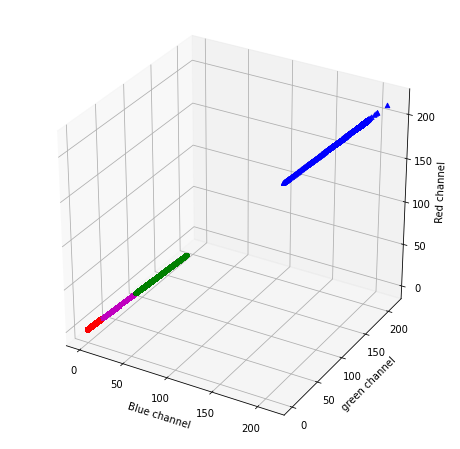

In [227]:
ind0, ind1, ind2, ind3 = [np.where(clustered1 == x)[0] for x in [0, 1, 2, 3]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
            ('b', '^', ind1),
            ('g', '8', ind2),
            ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix1[ind, 0]
    ys = pixel_matrix1[ind, 1]
    zs = pixel_matrix1[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

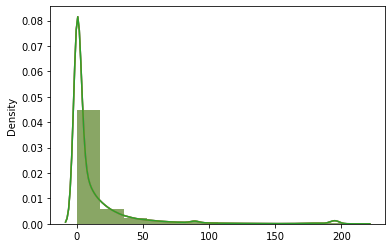

In [228]:
sns.distplot(pixel_matrix1[:,0], bins=12)
sns.distplot(pixel_matrix1[:,1], bins=12)
sns.distplot(pixel_matrix1[:,2], bins=12)

#### img5

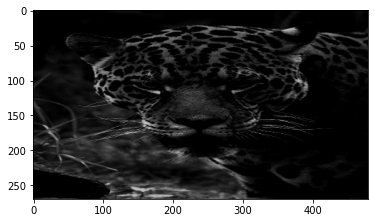

In [229]:
image5 = sample_lote1[4]

dims = image5.shape
pixel_matrix5 = np.reshape(image5, (dims[0] * dims[1], dims[2]))

clustered_img, clustered5 = clusteringImage(dims=dims,pixel_matrix=pixel_matrix5,image=image5)

plt.imshow(image5)

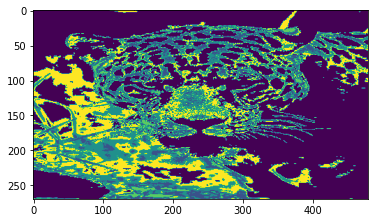

In [230]:
plt.imshow(clustered_img)

Text(0.5, 0, 'Red channel')

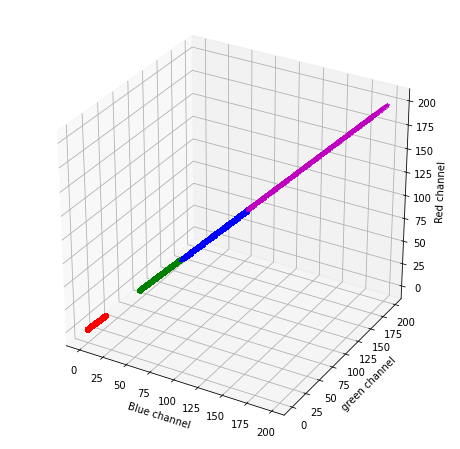

In [232]:
ind0, ind1, ind2, ind3 = [np.where(clustered5 == x)[0] for x in [0, 1, 2, 3]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
            ('b', '^', ind1),
            ('g', '8', ind2),
            ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix5[ind, 0]
    ys = pixel_matrix5[ind, 1]
    zs = pixel_matrix5[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

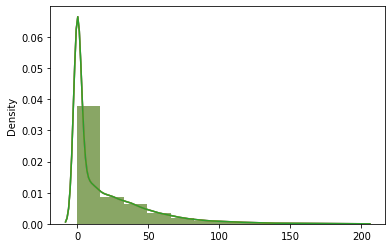

In [233]:
sns.distplot(pixel_matrix5[:,0], bins=12)
sns.distplot(pixel_matrix5[:,1], bins=12)
sns.distplot(pixel_matrix5[:,2], bins=12)

#### img10

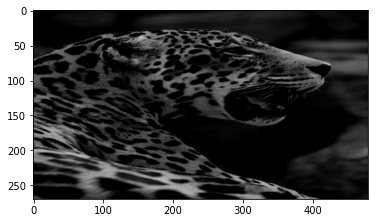

In [234]:
image10 = sample_lote1[11]

dims = image10 .shape
pixel_matrix10 = np.reshape(image10 , (dims[0] * dims[1], dims[2]))

clustered_img, clustered10 = clusteringImage(dims=dims,pixel_matrix=pixel_matrix10,image=image5)

plt.imshow(image10)

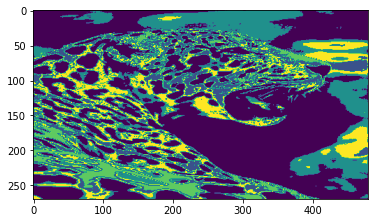

In [235]:
plt.imshow(clustered_img)

Text(0.5, 0, 'Red channel')

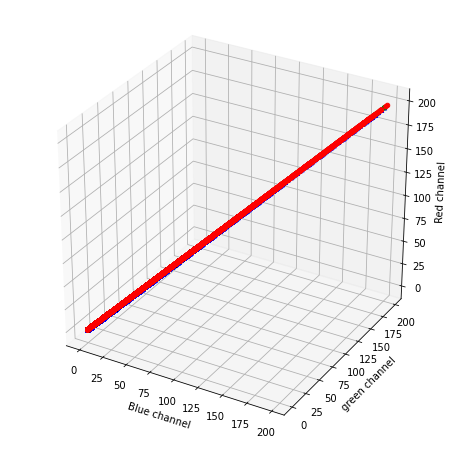

In [236]:
ind0, ind1, ind2, ind3 = [np.where(clustered10 == x)[0] for x in [0, 1, 2, 3]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
            ('b', '^', ind1),
            ('g', '8', ind2),
            ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix5[ind, 0]
    ys = pixel_matrix5[ind, 1]
    zs = pixel_matrix5[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

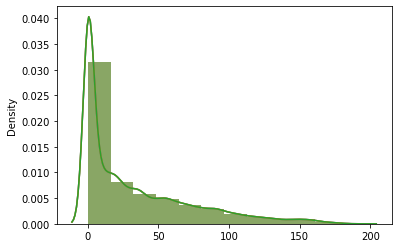

In [237]:
sns.distplot(pixel_matrix10[:,0], bins=12)
sns.distplot(pixel_matrix10[:,1], bins=12)
sns.distplot(pixel_matrix10[:,2], bins=12)

### Lote 3

#### img7

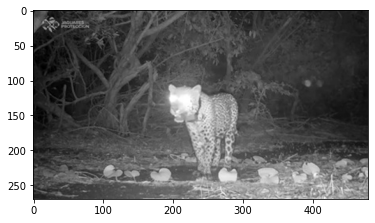

In [248]:
image7 = sample_lote3[6]

dims = image7 .shape
pixel_matrix7 = np.reshape(image7 , (dims[0] * dims[1], dims[2]))

clustered_img, clustered7 = clusteringImage(dims=dims,pixel_matrix=pixel_matrix7,image=image7)

plt.imshow(image7)

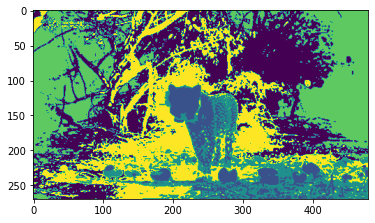

In [249]:
plt.imshow(clustered_img)

Text(0.5, 0, 'Red channel')

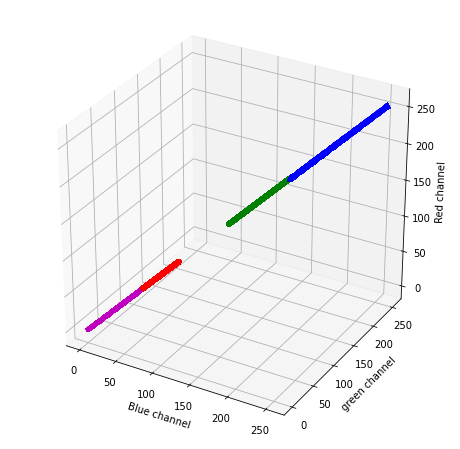

In [252]:
ind0, ind1, ind2, ind3 = [np.where(clustered7 == x)[0] for x in [0, 1, 2, 3]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
            ('b', '^', ind1),
            ('g', '8', ind2),
            ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix7[ind, 0]
    ys = pixel_matrix7[ind, 1]
    zs = pixel_matrix7[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

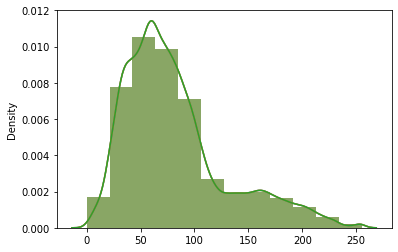

In [253]:
sns.distplot(pixel_matrix7[:,0], bins=12)
sns.distplot(pixel_matrix7[:,1], bins=12)
sns.distplot(pixel_matrix7[:,2], bins=12)

#### img11

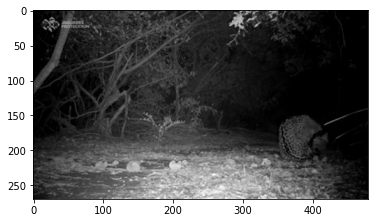

In [255]:
image11 = sample_lote3[10]

dims = image11.shape
pixel_matrix11 = np.reshape(image11 , (dims[0] * dims[1], dims[2]))

clustered_img, clustered11 = clusteringImage(dims=dims,pixel_matrix=pixel_matrix11,image=image11)

plt.imshow(image11)

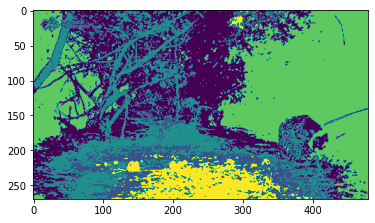

In [257]:
plt.imshow(clustered_img)

Text(0.5, 0, 'Red channel')

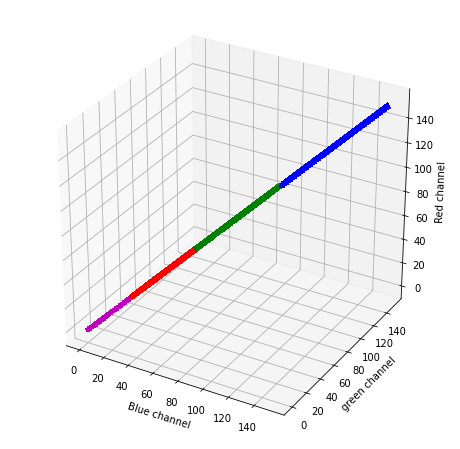

In [258]:
ind0, ind1, ind2, ind3 = [np.where(clustered11 == x)[0] for x in [0, 1, 2, 3]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
            ('b', '^', ind1),
            ('g', '8', ind2),
            ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = pixel_matrix11[ind, 0]
    ys = pixel_matrix11[ind, 1]
    zs = pixel_matrix11[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

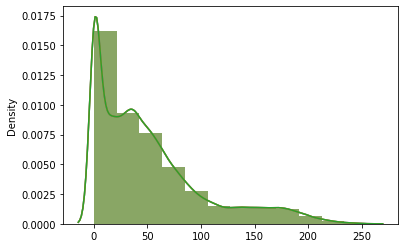

In [260]:
sns.distplot(pixel_matrix11[:,0], bins=12)
sns.distplot(pixel_matrix11[:,1], bins=12)
sns.distplot(pixel_matrix11[:,2], bins=12)

## Sobel Edge Detection

In [271]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [266]:
import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel
from skimage import color

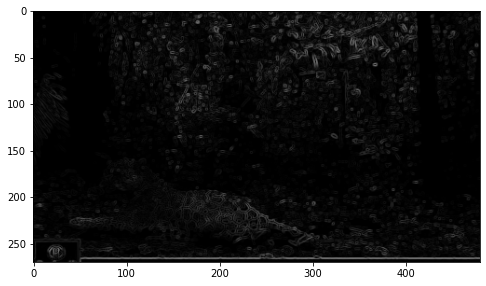

In [262]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(image1))

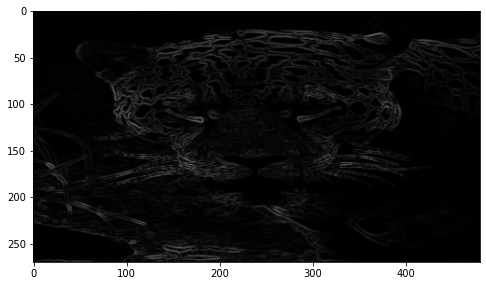

In [263]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(image5))

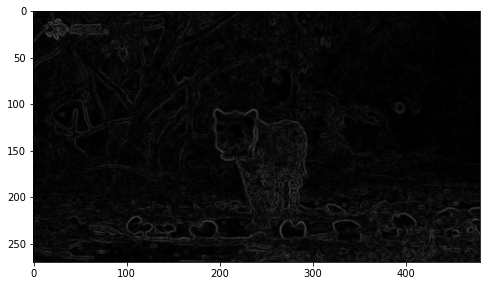

In [264]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(image7))

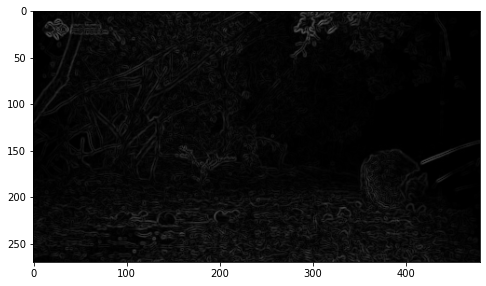

In [265]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(image11))

In [277]:
hsv1 = color.rgb2hsv(image1)
hsv2 = color.rgb2hsv(image5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

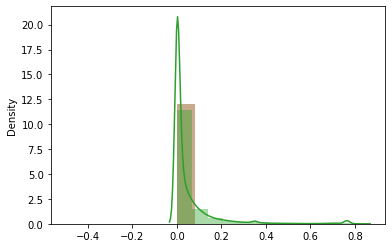

In [278]:
hsvmsi1 = MSImage(hsv1)
sns.distplot(hsvmsi1.matrix[:,0], bins=12)
sns.distplot(hsvmsi1.matrix[:,1], bins=12)
sns.distplot(hsvmsi1.matrix[:,2], bins=12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

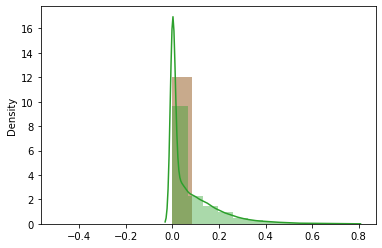

In [279]:
hsvmsi2 = MSImage(hsv2)
sns.distplot(hsvmsi2.matrix[:,0], bins=12)
sns.distplot(hsvmsi2.matrix[:,1], bins=12)
sns.distplot(hsvmsi2.matrix[:,2], bins=12)

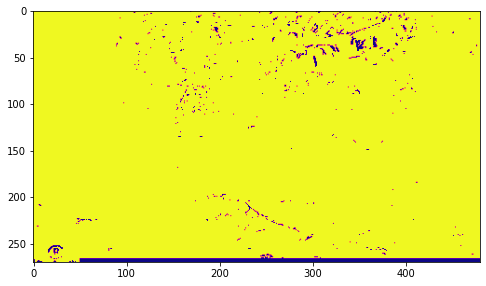

In [280]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(hsvmsi1.image[:,:,2] < 0.4, cmap="plasma")

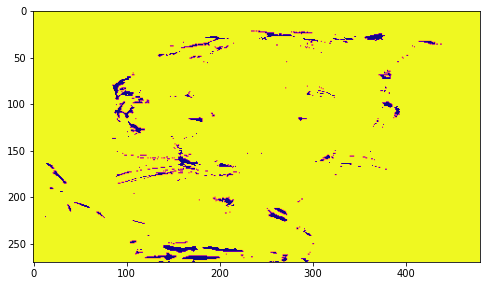

In [281]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(hsvmsi2.image[:,:,2] < 0.4, cmap="plasma")

In [282]:
hsv1 = color.rgb2hsv(image7)
hsv2 = color.rgb2hsv(image11)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

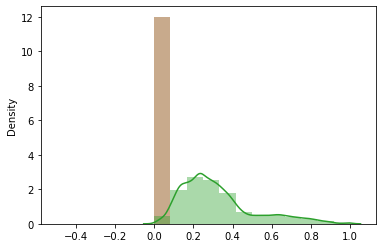

In [283]:
hsvmsi1 = MSImage(hsv1)
sns.distplot(hsvmsi1.matrix[:,0], bins=12)
sns.distplot(hsvmsi1.matrix[:,1], bins=12)
sns.distplot(hsvmsi1.matrix[:,2], bins=12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

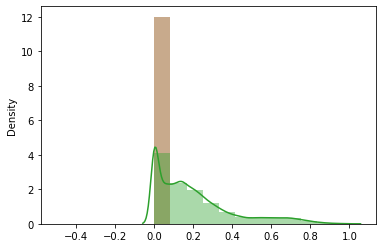

In [284]:
hsvmsi2 = MSImage(hsv2)
sns.distplot(hsvmsi2.matrix[:,0], bins=12)
sns.distplot(hsvmsi2.matrix[:,1], bins=12)
sns.distplot(hsvmsi2.matrix[:,2], bins=12)

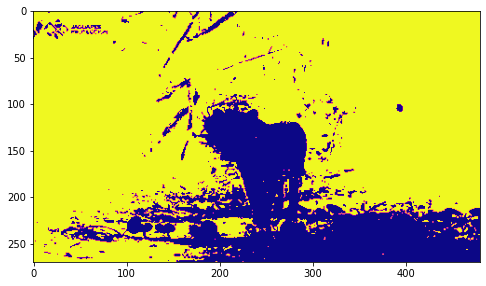

In [285]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(hsvmsi1.image[:,:,2] < 0.4, cmap="plasma")

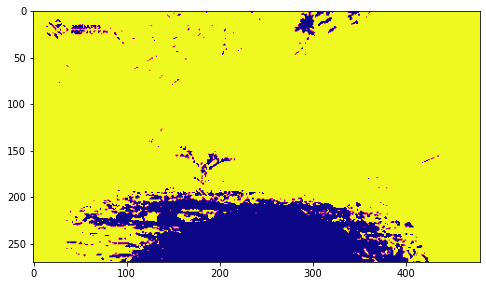

In [286]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(hsvmsi2.image[:,:,2] < 0.4, cmap="plasma")

### Using thresholds with brighness normalization

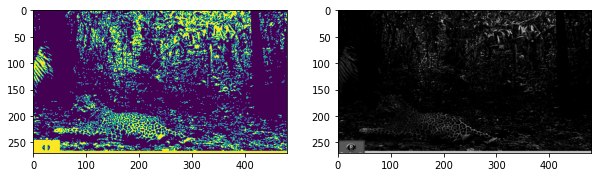

In [296]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(image1[:,:,0] > 15)
plt.subplot(122)
plt.imshow(image1)
plt.show()

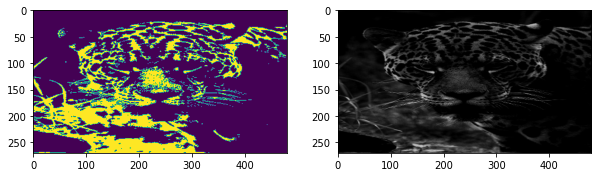

In [297]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(image5[:,:,0] > 30)
plt.subplot(122)
plt.imshow(image5)
plt.show()

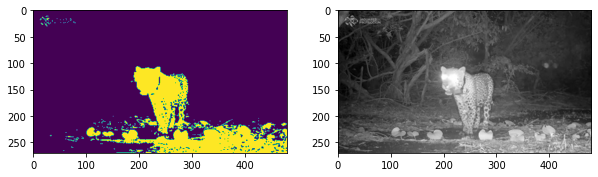

In [300]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(image7[:,:,0] > 130)
plt.subplot(122)
plt.imshow(image7)
plt.show()

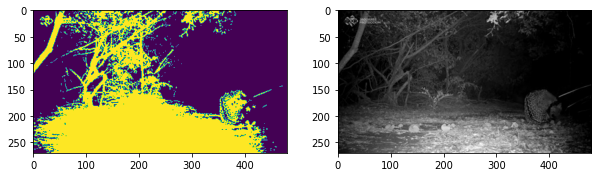

In [305]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(image11[:,:,0] > 45)
plt.subplot(122)
plt.imshow(image11)
plt.show()